In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('toy_dataset.csv')

In [3]:
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
df.columns

Index(['Number', 'City', 'Gender', 'Age', 'Income', 'Illness'], dtype='object')

In [5]:
df['City'].value_counts()

New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: City, dtype: int64

In [6]:
df['City'].unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

In [7]:
city=['New York City','Dallas','Los Angeles','Mountain View', 'Austin','Boston', 'Washington D.C.','San Diego']

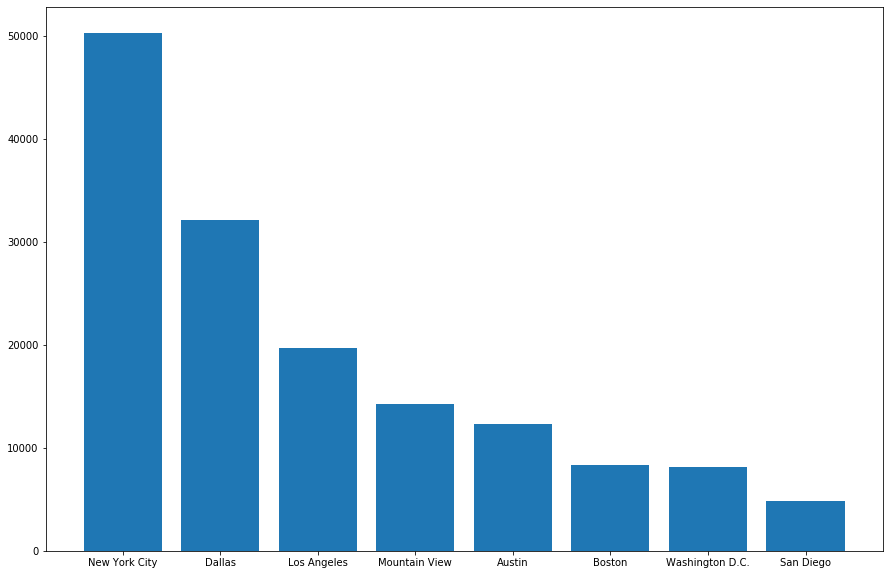

In [8]:
fig = plt.figure(figsize = (15, 10))
plt.bar(city,df['City'].value_counts().values)
plt.show()

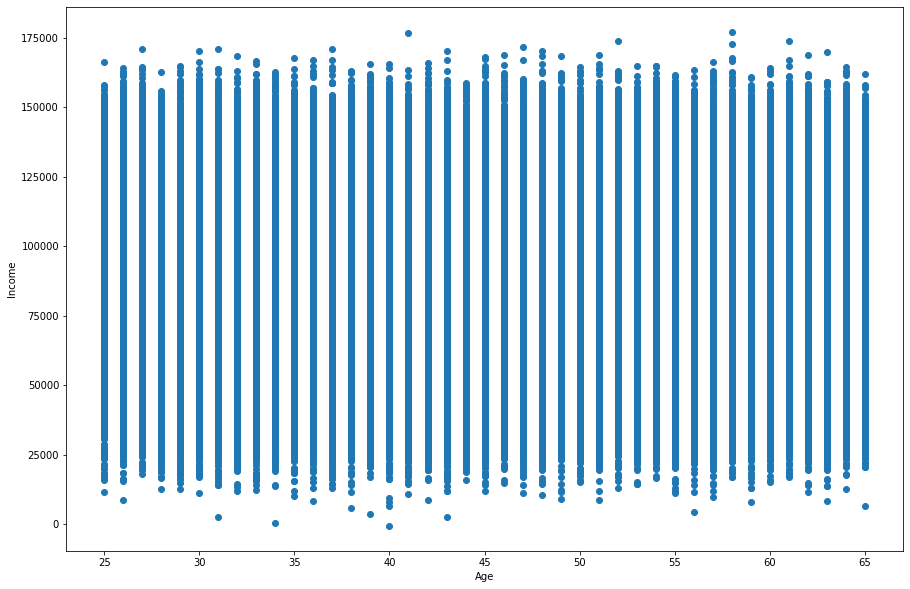

In [238]:
fig = plt.figure(figsize = (15, 10))
plt.scatter(df['Age'],df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [10]:
num_data=df[['Age','Income']]

In [11]:
k=3 #no. of cluster
mui = (df.sample(n=k)) #intializing random centroids

In [14]:
diff = 1
j=0
i=1
# exit if centroids are not changing
while(diff!=0):
    copy=num_data
    i=1
    #to check for each cluster
    for index1,row_c in mui.iterrows():
        l=0
        euc_dist=np.empty(len(df))
        euc_dist=euc_dist.tolist()
        #to calculate eculadien distance for each point
        for index2,row_d in copy.iterrows():
            d1=(row_c["Age"]-row_d["Age"])**2
            d2=(row_c["Income"]-row_d["Income"])**2
            d=np.sqrt(d1+d2)
            euc_dist[l]=d
            l+=1
        num_data[i]=euc_dist
        i=i+1

    C=np.empty(len(df))
    C=C.tolist()
    l=0
    #to assign each point the cluster
    for index,row in num_data.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C[l]=pos
        l+=1
    num_data["new"]=C #storing values of clusters assigned
    mui_updated = num_data.groupby(["new"]).mean()[["Income","Age"]]
    if j == 0:
        diff=1
        j=j+1
    else: 
        diff = (mui_updated['Income'] - mui['Income']).sum() + (mui_updated['Age'] - mui['Age']).sum()
        print(diff.sum())
    mui = num_data.groupby(["new"]).mean()[["Income","Age"]] #update the centroids

C:\Users\Abdullah\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


10265.88728976264
10522.376648822352
9911.60554787982
8178.594271444474
6468.872700153949
5117.441181709653
4171.222742372268
3426.5865389573905
2867.5114662956394
2359.6826287337635
1944.0130049869063
1622.319723429226
1276.1184437246052
1042.4991634709856
823.6077618318741
602.6911494100871
492.4488913268772
393.21315727505043
312.4547545126611
254.48479899608256
203.34759713236235
160.27698614524218
121.66946089884269
108.70644064828178
91.1311288539959
63.30471821859942
57.61644925599576
47.670589436776766
32.2156115566354
20.33244059655729
22.839406421695045
17.28610393737562
17.29562943890729
20.713563402782555
14.232336791657993
14.240019732277183
10.37611935295429
3.4081602620750218
1.5491819703245895
1.548755559933106
2.3245264051130334
3.871979046150635
1.8607000062378845
0.0


In [15]:
mui

,Income,Age
new,,
1,125401.415466,44.916676
2,49161.704179,45.028560
3,92733.961465,44.939193


In [22]:
num_data

,Age,Income,1,2,3,new
0,41,40367.0,85034.415557,8794.705102,52366.961613,2
1,54,45084.0,80317.415980,4077.714048,47649.962326,2
2,42,52483.0,72918.415525,3321.297202,40250.961572,2
3,40,40941.0,84460.415610,8220.705717,51792.961700,2
4,46,50289.0,75112.415474,1127.296240,42444.961478,2
...,...,...,...,...,...,...
149995,48,93669.0,31732.415616,44507.295920,935.043545,3
149996,25,96748.0,28653.422388,47586.300036,4014.088058,3
149997,26,111885.0,13516.428704,62723.298707,19151.047900,1
149998,25,111878.0,13523.430133,62716.299019,19144.048919,1


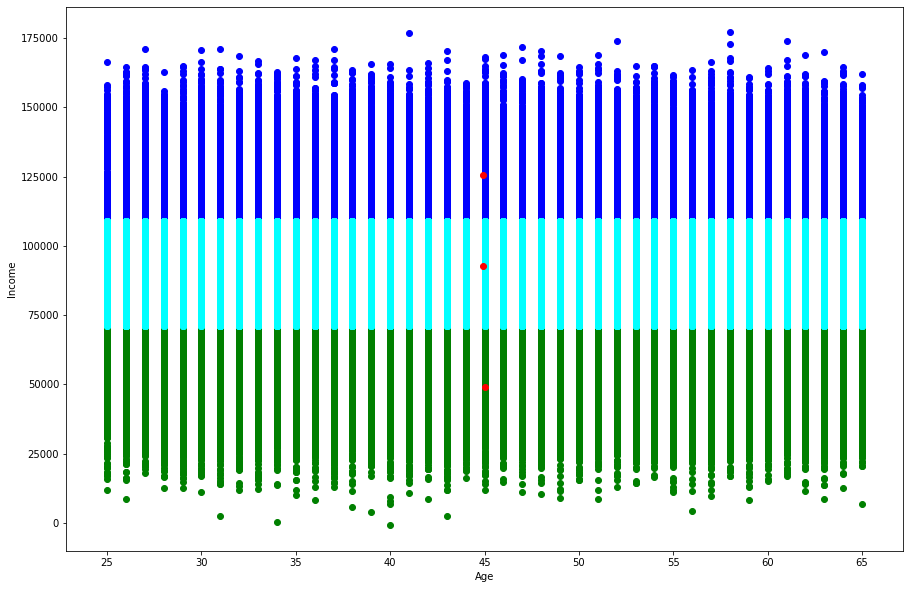

In [16]:
fig = plt.figure(figsize = (15, 10))
color=['blue','green','cyan']
for K in range(k):
    data=num_data[num_data["new"]==K+1]
    plt.scatter(data["Age"],data["Income"],c=color[K])
plt.scatter(mui["Age"],mui["Income"],c='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# using sklearn kmeans

In [18]:
from sklearn.cluster import KMeans

In [32]:
num_data1=df[['Age','Income']]

In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_data1)

In [112]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='random')
kmeans.fit(num_data1)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=-1, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [113]:
print(kmeans.cluster_centers_)

[[4.50262493e+01 4.92384739e+04]
 [4.49162967e+01 1.25578210e+05]
 [4.49397455e+01 9.28020091e+04]]


In [114]:
mui1=kmeans.cluster_centers_

In [115]:
kmeans.n_iter_

7

In [156]:
kmeans.inertia_

17395660860632.309

In [157]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 2])

In [155]:
num_data1['new']=kmeans.labels_.tolist() #adding clusters alotred to the data frame

C:\Users\Abdullah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
len(mui1)

3

In [136]:
age=np.empty(len(mui1))
age=age.tolist()
for i in range(len(mui)):
    age[i]=mui1[i][0]
    
inc=np.empty(len(mui1))
inc=inc.tolist()
for i in range(len(mui)):
    inc[i]=mui1[i][1]

In [135]:
age

[45.026249309228696, 44.916296742156355, 44.93974552424449]

In [137]:
inc

[49238.47390858842, 125578.210104588, 92802.00911463957]

In [152]:
num_data1

,Age,Income,new
0,41,40367.0,0
1,54,45084.0,0
2,42,52483.0,0
3,40,40941.0,0
4,46,50289.0,0
...,...,...,...
149995,48,93669.0,2
149996,25,96748.0,2
149997,26,111885.0,1
149998,25,111878.0,1


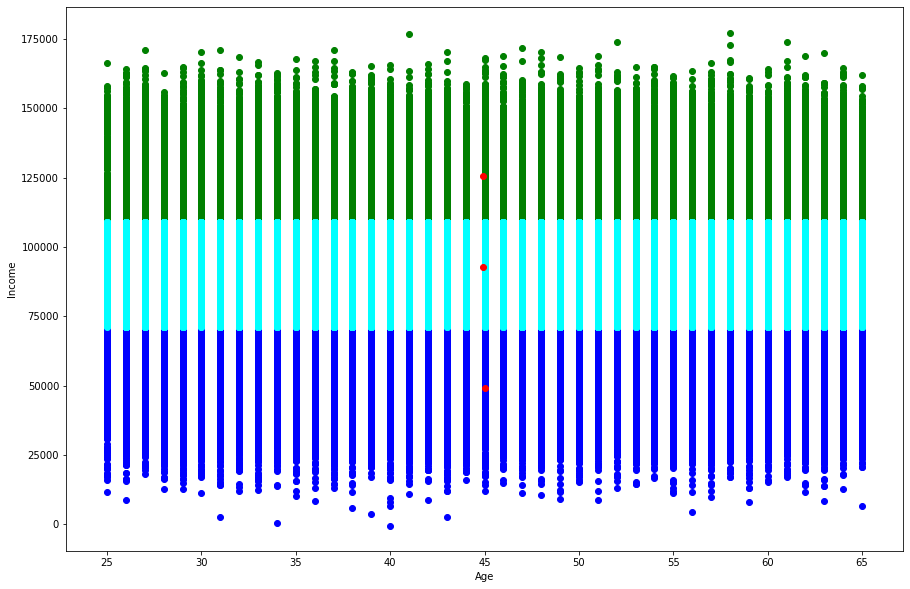

In [154]:
fig = plt.figure(figsize = (15, 10))
color=['blue','green','cyan']
for K in range(k):
    data=num_data[num_data1["new"]==K]
    plt.scatter(data["Age"],data["Income"],c=color[K])
plt.scatter(age,inc,c='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Ordinal Encoding

In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
df.columns

Index(['Number', 'City', 'Gender', 'Age', 'Income', 'Illness'], dtype='object')

In [39]:
df['City'].unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

In [50]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [51]:
df['Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [52]:
city=['Dallas', 'New York City', 'Los Angeles', 'Mountain View','Boston', 'Washington D.C.', 'San Diego', 'Austin']
gen=['Male', 'Female']
ill=['No', 'Yes']

In [87]:
ordi1 = OrdinalEncoder(categories=[city])
ordi1.fit(df[['City']])

OrdinalEncoder(categories=[['Dallas', 'New York City', 'Los Angeles',
                            'Mountain View', 'Boston', 'Washington D.C.',
                            'San Diego', 'Austin']],
               dtype=<class 'numpy.float64'>)

In [86]:
ordi2 = OrdinalEncoder(categories=[gen])
ordi2.fit(df[['Gender']])

OrdinalEncoder(categories=[['Male', 'Female']], dtype=<class 'numpy.float64'>)

In [85]:
ordi3 = OrdinalEncoder(categories=[ill])
ordi3.fit(df[['Illness']])

OrdinalEncoder(categories=[['No', 'Yes']], dtype=<class 'numpy.float64'>)

In [107]:
c=pd.DataFrame(ordi1.transform(df[['City']]),columns=['city'])
c['gender']=pd.DataFrame(ordi2.transform(df[['Gender']]),columns=['gender'])['gender'].tolist()
c['illness']=pd.DataFrame(ordi3.transform(df[['Illness']]),columns=['illness'])['illness'].tolist()

In [109]:
c['income']=df['Income']
c['age']=df['Age']

# normalization

In [158]:
a=df['Age'].tolist()
z=np.array(a)
z=(z - z.min()) / (z.max() - z.min())
c['age']=z.tolist()

a=df['Income'].tolist()
z=np.array(a)
z=(z - z.min()) / (z.max() - z.min())
c['income']=z.tolist()

In [159]:
c.head(10)

,city,gender,illness,income,age
0,0.0,0.0,0.0,0.230700,0.400
1,0.0,0.0,0.0,0.257228,0.725
2,0.0,0.0,0.0,0.298840,0.425
3,0.0,0.0,0.0,0.233928,0.375
4,0.0,0.0,0.0,0.286501,0.525
5,0.0,1.0,0.0,0.289296,0.275
6,0.0,1.0,0.0,0.190140,0.175
7,0.0,0.0,0.0,0.177537,0.350
8,0.0,0.0,0.0,0.389858,0.650
9,0.0,1.0,0.0,0.285337,0.125


In [160]:
c.tail(10)

,city,gender,illness,income,age
149990,7.0,1.0,0.0,0.465759,0.025
149991,7.0,0.0,0.0,0.552069,0.650
149992,7.0,0.0,0.0,0.500880,0.300
149993,7.0,0.0,0.0,0.509305,0.975
149994,7.0,1.0,0.0,0.600362,0.300
149995,7.0,0.0,0.0,0.530468,0.575
149996,7.0,0.0,0.0,0.547784,0.000
149997,7.0,0.0,0.0,0.632914,0.025
149998,7.0,0.0,0.0,0.632874,0.000
149999,7.0,1.0,0.0,0.494373,0.300


# using mutilple value of K

### using categorical data 

Text(0, 0.5, 'SSE')

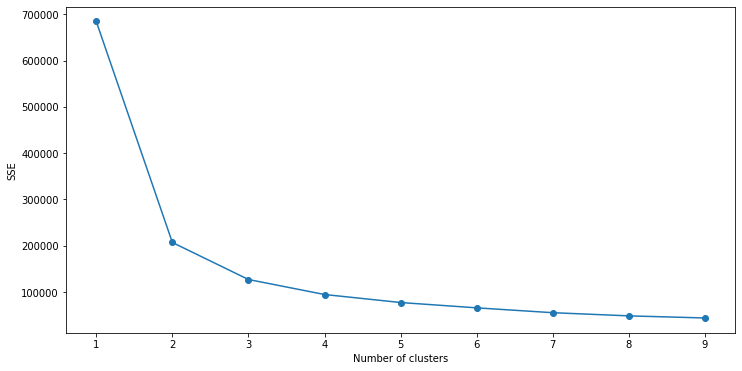

In [165]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(c)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [166]:
SSE

[684311.8978411794,
 207037.5675817728,
 127068.09173194255,
 94661.45940031117,
 77344.43040925568,
 65859.35379318314,
 55382.51148012662,
 48544.84201309923,
 43990.65798027587]

### using numerical data only

In [221]:
num_data2=df[['Age','Income']]

Text(0, 0.5, 'SSE')

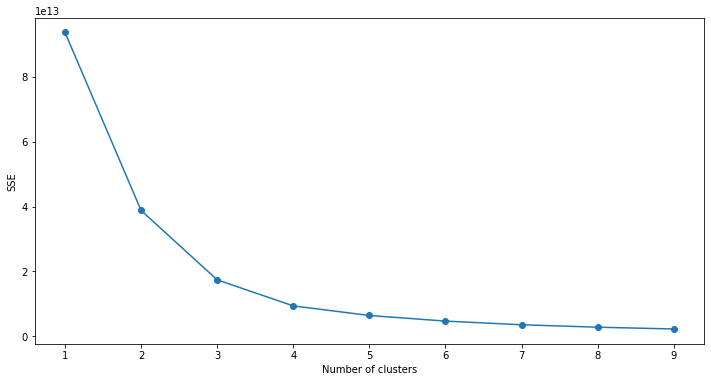

In [171]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(num_data2)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [239]:
SSE

[93670669260246.95,
 38779217529547.77,
 17397610583762.574,
 9361343405439.004,
 6404391240756.98,
 4676658199023.939,
 3546083158668.1846,
 2793290123450.0845,
 2246123354340.512]

In [222]:
d = {}
num_data3=df[['Age','Income']]

In [223]:
for cluster in range(2,6):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(num_data2)
    num_data3["clusters={0}".format(cluster)]=kmeans.labels_.tolist()
    d["cluster{0}".format(cluster)] = kmeans.cluster_centers_
    print(kmeans.cluster_centers_)

C:\Users\Abdullah\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[[4.49489559e+01 1.01451500e+05]
 [4.49545769e+01 5.53716408e+04]]


C:\Users\Abdullah\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[[4.49371188e+01 9.25527498e+04]
 [4.50235945e+01 4.90650203e+04]
 [4.49295243e+01 1.24841570e+05]]


C:\Users\Abdullah\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[[4.49390498e+01 1.02799718e+05]
 [4.50338124e+01 4.60791712e+04]
 [4.49926403e+01 1.34893344e+05]
 [4.49159959e+01 8.37984472e+04]]
[[4.50048833e+01 1.37429936e+05]
 [4.49622454e+01 9.33992515e+04]
 [4.50473104e+01 4.42748714e+04]
 [4.48950885e+01 1.08478168e+05]
 [4.49027938e+01 7.68336030e+04]]


In [224]:
num_data3

,Age,Income,clusters=2,clusters=3,clusters=4,clusters=5
0,41,40367.0,1,1,1,2
1,54,45084.0,1,1,1,2
2,42,52483.0,1,1,1,2
3,40,40941.0,1,1,1,2
4,46,50289.0,1,1,1,2
...,...,...,...,...,...,...
149995,48,93669.0,0,0,0,1
149996,25,96748.0,0,0,0,1
149997,26,111885.0,0,2,0,3
149998,25,111878.0,0,2,0,3


In [225]:
d

{'cluster2': array([[4.49489559e+01, 1.01451500e+05],
        [4.49545769e+01, 5.53716408e+04]]),
 'cluster3': array([[4.49371188e+01, 9.25527498e+04],
        [4.50235945e+01, 4.90650203e+04],
        [4.49295243e+01, 1.24841570e+05]]),
 'cluster4': array([[4.49390498e+01, 1.02799718e+05],
        [4.50338124e+01, 4.60791712e+04],
        [4.49926403e+01, 1.34893344e+05],
        [4.49159959e+01, 8.37984472e+04]]),
 'cluster5': array([[4.50048833e+01, 1.37429936e+05],
        [4.49622454e+01, 9.33992515e+04],
        [4.50473104e+01, 4.42748714e+04],
        [4.48950885e+01, 1.08478168e+05],
        [4.49027938e+01, 7.68336030e+04]])}

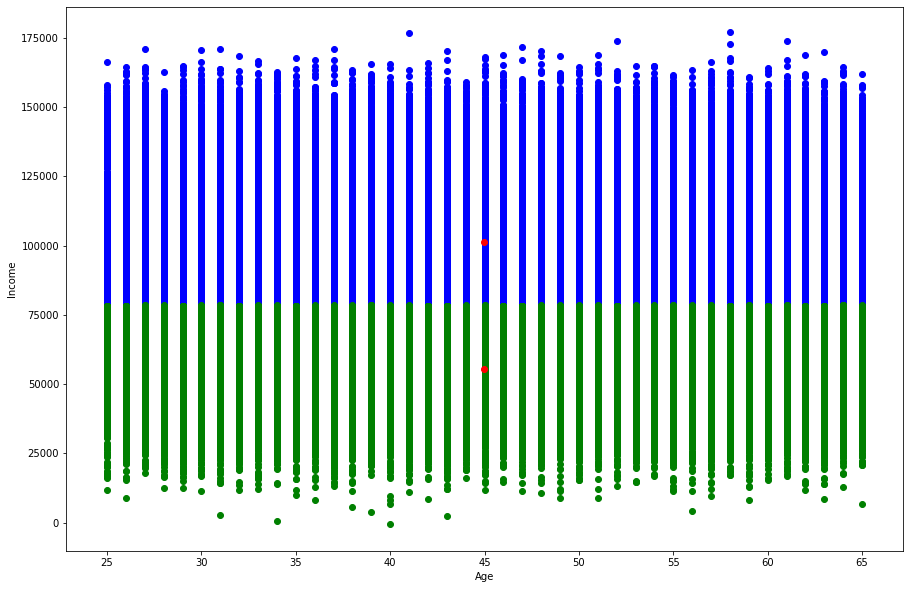

In [234]:
muix=d['cluster2'].tolist()

age=np.empty(len(muix))
age=age.tolist()
for i in range(len(muix)):
    age[i]=muix[i][0]
    
inc=np.empty(len(muix))
inc=inc.tolist()
for i in range(len(muix)):
    inc[i]=muix[i][1]

k=len(muix)
fig = plt.figure(figsize = (15, 10))
color=['blue','green','cyan','yellow','orange','black','pink','purple','brown']
for K in range(k):
    data=num_data3[num_data3["clusters=2"]==K]
    plt.scatter(data["Age"],data["Income"],c=color[K])
plt.scatter(age,inc,c='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

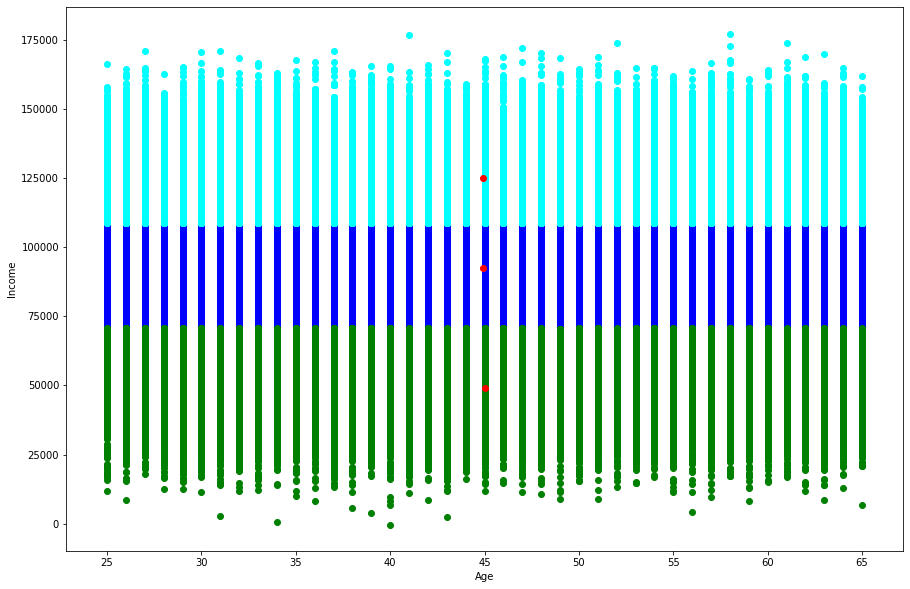

In [235]:
muix=d['cluster3'].tolist()

age=np.empty(len(muix))
age=age.tolist()
for i in range(len(muix)):
    age[i]=muix[i][0]
    
inc=np.empty(len(muix))
inc=inc.tolist()
for i in range(len(muix)):
    inc[i]=muix[i][1]

k=len(muix)
fig = plt.figure(figsize = (15, 10))
color=['blue','green','cyan','yellow','orange','black','pink','purple','brown']
for K in range(k):
    data=num_data3[num_data3["clusters=3"]==K]
    plt.scatter(data["Age"],data["Income"],c=color[K])
plt.scatter(age,inc,c='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

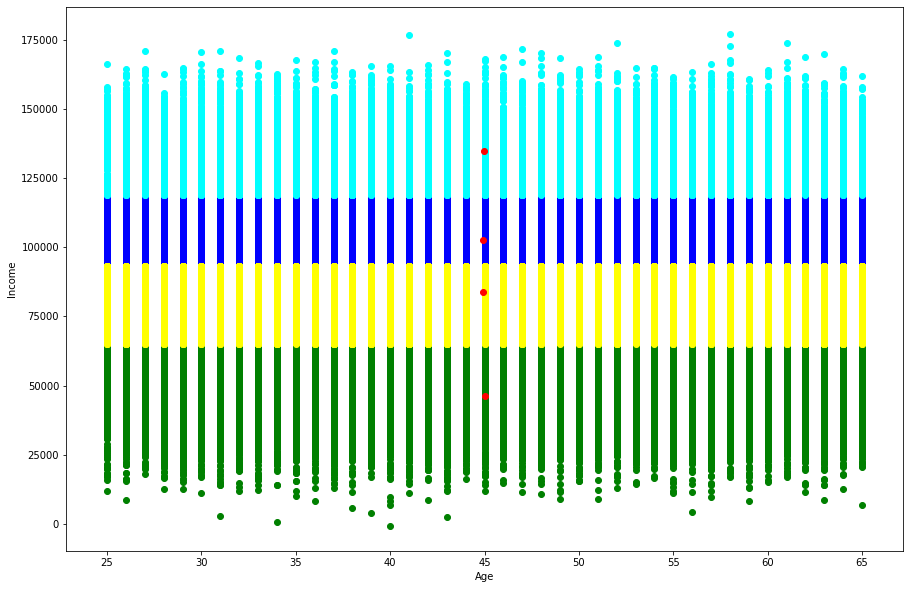

In [236]:
muix=d['cluster4'].tolist()

age=np.empty(len(muix))
age=age.tolist()
for i in range(len(muix)):
    age[i]=muix[i][0]
    
inc=np.empty(len(muix))
inc=inc.tolist()
for i in range(len(muix)):
    inc[i]=muix[i][1]

k=len(muix)
fig = plt.figure(figsize = (15, 10))
color=['blue','green','cyan','yellow','orange','black','pink','purple','brown']
for K in range(k):
    data=num_data3[num_data3["clusters=4"]==K]
    plt.scatter(data["Age"],data["Income"],c=color[K])
plt.scatter(age,inc,c='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

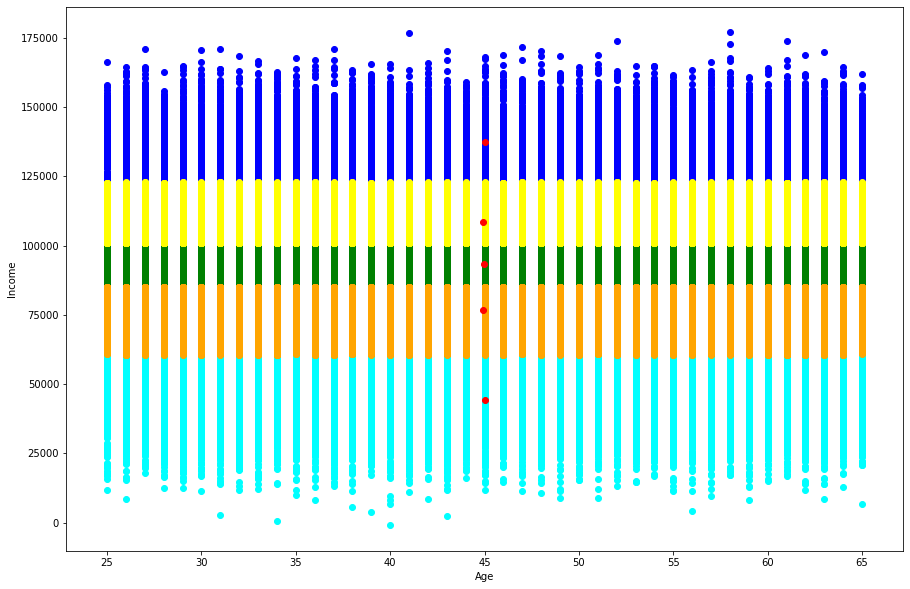

In [237]:
muix=d['cluster5'].tolist()

age=np.empty(len(muix))
age=age.tolist()
for i in range(len(muix)):
    age[i]=muix[i][0]
    
inc=np.empty(len(muix))
inc=inc.tolist()
for i in range(len(muix)):
    inc[i]=muix[i][1]

k=len(muix)
fig = plt.figure(figsize = (15, 10))
color=['blue','green','cyan','yellow','orange','black','pink','purple','brown']
for K in range(k):
    data=num_data3[num_data3["clusters=5"]==K]
    plt.scatter(data["Age"],data["Income"],c=color[K])
plt.scatter(age,inc,c='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()